In [44]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
pd.set_option('display.max_rows', 100)

# 1. Understanding and Preprocessing the data 

In [138]:
data1 = pd.read_csv('Datasets/KAUSHIL268-dataset/Training.csv')
data2 = pd.read_csv('Datasets/KAUSHIL268-dataset/Testing.csv')
# data1 appears to 1 empty column saved as 'unnamed'
data1 = data1.drop(['Unnamed: 133'], axis=1)

In [139]:
dataframe = pd.concat([data1,data2])
dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4962 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.1+ MB


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [140]:
# Check for balance
disease_counts = dataframe['prognosis'].value_counts()
# # The data is extremely balanced over 41 diseases/diagnoses
disease_counts


prognosis
Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                                121
All

In [141]:
# Turn all x into booleans and get y 
X = dataframe.iloc[:, :-1].astype(bool)
y_names = dataframe['prognosis']
print(y_names)
y = LabelEncoder().fit_transform(y_names)

# Make key for use later, in chatbot. 
df = pd.DataFrame({"disease_name": y_names, "label": y})

# df.drop_duplicates().to_csv('disease_key.csv', index=False)


0            Fungal infection
1            Fungal infection
2            Fungal infection
3            Fungal infection
4            Fungal infection
               ...           
37                       Acne
38    Urinary tract infection
39                  Psoriasis
40                   Impetigo
41           Fungal infection
Name: prognosis, Length: 4962, dtype: object


In [142]:
# 70-10-20 train val test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1) # 0.125 x 0.8 = 0.1

X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
38,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39,False,True,False,False,False,False,True,False,False,False,...,False,False,False,True,True,True,True,False,False,False
40,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


# 2. Building the Model
I will utilise *ensemble learning* to combine the most effective models i try, which means combining the predictions of each to get the most likely.
Models I use include: Naive Bayes, SVM, Random Forest and KNN, with k-fold


In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Define the ensemble model with different classifiers
ensemble_model = VotingClassifier(estimators=[
    ('nb', GaussianNB()),
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True)),  # Set probability to True for voting
    ('knn', KNeighborsClassifier())
], voting='hard')  # Hard voting for final prediction

In [144]:
from sklearn.model_selection import StratifiedKFold
# Kfold setup 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) 
accuracy_scores = []

# Perform Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the ensemble model
    ensemble_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ensemble_model.predict(X_test)

    # Evaluate the model (e.g., calculate accuracy)
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Fold Accuracy: {accuracy:.4f}")

# Print overall performance (optional)
if accuracy_scores:
    print(f"\nAverage Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.4f}")

Fold Accuracy: 1.0000
Fold Accuracy: 1.0000
Fold Accuracy: 1.0000
Fold Accuracy: 1.0000
Fold Accuracy: 1.0000
Fold Accuracy: 1.0000


KeyboardInterrupt: 

In [145]:
# Define the individual classifiers
nb_model = GaussianNB()
svm_model = SVC(probability=True)  # Set probability to True for voting
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

# Define a dictionary to store model names and objects
models = {
    'nb': nb_model,
    'svm': svm_model,
    'rf': rf_model,
    'knn': knn_model,
}

# Define the number of folds for k-fold validation
n_splits = 10

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Function to perform k-fold cross-validation for a model
def evaluate_model(model, X, y, cv=n_splits, scoring='accuracy'):
  scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
  print(f"\nModel: {model.__class__.__name__}")
  print(f"Scores: {scores}")
  print(f"Mean Score: {np.mean(scores):.4f}")

# Perform K-Fold Cross-Validation on each model
for model_name, model in models.items():
  evaluate_model(model, X, y)



Model: GaussianNB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000

Model: SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000

Model: RandomForestClassifier
Scores: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99798387]
Mean Score: 0.9998

Model: KNeighborsClassifier
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0000


So, i decided to drop the RandomForestClassifier and make an ensemble model with the other 3

## Create Ensemble Classifier for Chosen Classifiers

In [146]:
from joblib import dump, load

In [147]:
nb_model = GaussianNB()
svm_model = SVC(probability=True)  # Set probability to True for voting
knn_model = KNeighborsClassifier()

# Define the ensemble model (excluding Random Forest)
ensemble_model = VotingClassifier(estimators=[
    ('nb', GaussianNB()),
    ('svm', svm_model),
    ('knn', KNeighborsClassifier())
], voting='hard')  # Hard voting for final prediction

# Train the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val = ensemble_model.predict(X_val)
# Evaluate the ensemble model on the validation set (e.g., accuracy)
validation_accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

# Make predictions on the test set (optional)
y_pred_test = ensemble_model.predict(X_test)

# Evaluate the ensemble model on the test set (optional)
if X_test is not None and y_test is not None:
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
# Save the model
dump(ensemble_model, 'symptom_classifier.joblib')

Validation Accuracy: 1.0000
Test Accuracy: 1.0000


['symptom_classifier.joblib']

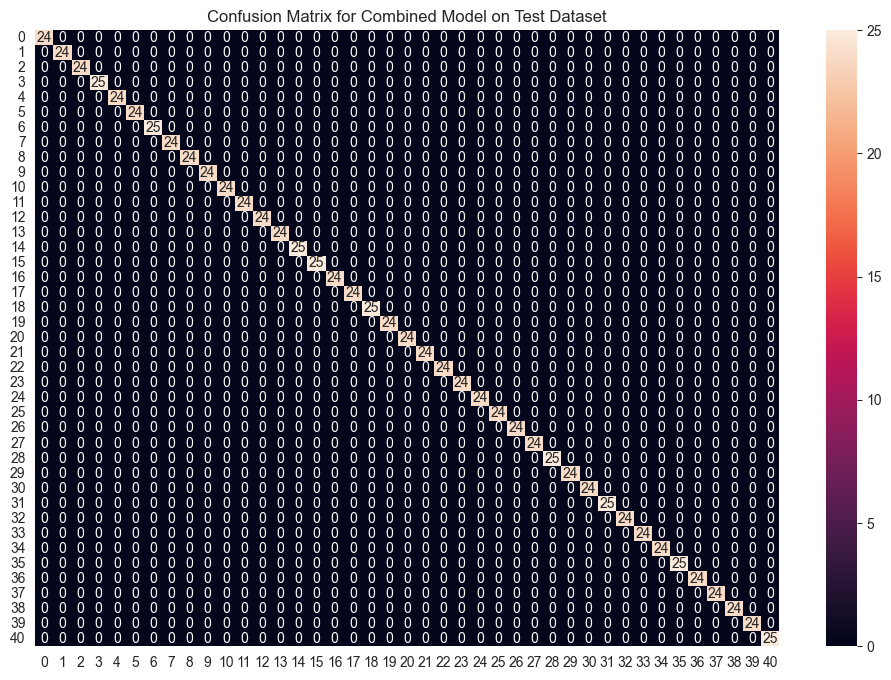

In [175]:
cf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

Seems too good to be true....
Lets test with a slightly inaccurate set of symptoms (lets  say someone who has mostly allergy symptoms also has a cold...)  

## 4. Decide Confidence Descriptor
We need some form of descriptor to decide how confident our model is with its classification. I chose SVM's probability, as although they are estimates, they are a good pointer to how sure the model is. Considering the model is 100% accurate with this data, i looked at the corresponding predict_proba values. 

In [161]:
fitted_svm_model = ensemble_model.estimators_[1]

svm_proba_val = fitted_svm_model.predict_proba(X_val)
max_svm_proba = pd.DataFrame(svm_proba_val.max(axis=1))

validation = pd.DataFrame(y_val)
prob_to_result = pd.concat([validation,max_svm_proba], axis=1)
# Look at probabilities mapped to their correct input 
prob_to_result

,0,0
0,23,0.688153
1,3,0.806726
2,9,0.686416
3,0,0.665311
4,23,0.837151
...,...,...
492,5,0.794750
493,23,0.688153
494,30,0.798397
495,22,0.863454


In [162]:
max_svm_proba.describe()

,0
count,497.000000
mean,0.763650
std,0.073541
min,0.630104
25%,0.678473
50%,0.793066
75%,0.820643
max,0.883546


This suggests the distribution isn't too big, and probabilities above 0.63 seem to be confident. Since we want our model to be very sure, 0.6 will be our confidence cut off. Otherwise the model will return NOT CONFIDENT. Used in main.py 